# 📊 Sales Forecasting Model with Complete Data Pipeline 🧠💼

A complete data analysis and forecasting pipeline using Python, including data cleaning, visualization, and predictive modeling to understand and forecast sales trends effectively.


## 📦 Step 1: Importing Essential Libraries
Importing core libraries like Pandas, NumPy, Matplotlib, and Seaborn for data manipulation and visualization.


In [1]:
# Importing libraries and configuring display options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set display options for pandas and seaborn
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## 📁 Step 2: Upload Dataset to Google Colab
Using `files.upload()` to upload the dataset directly from your local machine to the Colab environment.


In [2]:
# Loading the dataset from CSV
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


## 📊 Step 3: Load and Preview the Dataset
Reading the uploaded CSV file using `pandas` and displaying the first few rows to understand the data structure.


In [3]:
# Showing dataset shape, info, and first few rows
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 📋 Step 4: Dataset Overview and Missing Value Check
Displaying the shape, info, basic statistics, and null values in the dataset to understand its structure and quality.


In [4]:
# Getting data types and basic statistical summary
print("Dataset shape:", df.shape)

# Handling nulls or dropping unnecessary columns
df.info()
df.describe()
df.isnull().sum()

Dataset shape: (9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-nu

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## 🕒 Step 5: Convert 'Order Date' to DateTime Format
Converting the 'Order Date' column to proper datetime format for time-based analysis.


In [5]:
# Converting 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

## 📆 Step 6: Extract Date Features
Extracting year, month, day, and weekday from the 'Order Date' column to support time-series analysis and feature engineering.


In [6]:
# Creating 'Year-Month' column for time-based analysis

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.day_name()

# Display sample
df[['Order Date', 'Year', 'Month', 'Day', 'Weekday']].head()

,Order Date,Year,Month,Day,Weekday
0,2017-11-08,2017,11,8,Wednesday
1,2017-11-08,2017,11,8,Wednesday
2,2017-06-12,2017,6,12,Monday
3,2016-10-11,2016,10,11,Tuesday
4,2016-10-11,2016,10,11,Tuesday


## 📊 Step 7: Dataset Summary & Initial Exploration
Displaying dataset shape, data types, missing values, statistical summary, and unique values for selected categorical features to understand data structure and quality.



In [7]:
# Prints a comprehensive summary of the DataFrame.
print("Shape of dataset:", df.shape)


print("\nData types:\n", df.dtypes)


print("\nMissing values:\n", df.isnull().sum())


print("\nSummary statistics:\n", df.describe())


columns_to_check = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
for col in columns_to_check:
    print(f"\nUnique values in '{col}':", df[col].unique())

print("\nFirst 5 rows of the dataset:")
print(df.head())

Shape of dataset: (9800, 22)

Data types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Year                      int32
Month                     int32
Day                       int32
Weekday                  object
dtype: object

Missing values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
P

## 📈 Step 8: Monthly Sales Trend Visualization
Visualizing monthly sales trend over time to identify seasonal patterns, growth, or decline.



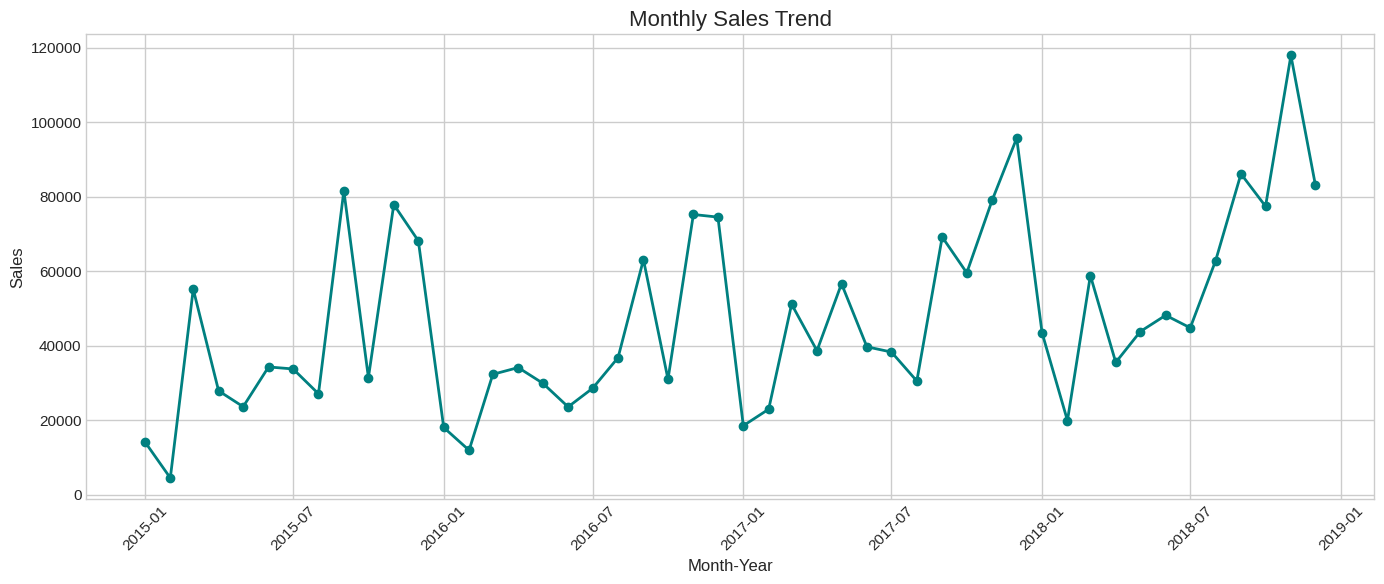

In [8]:
# Plots the monthly sales trend.
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')


monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()


monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))


plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o', color='teal', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🗺️ Step 9: Regional Sales Analysis
Bar chart showing total sales grouped by region to understand which regions generate the most revenue.


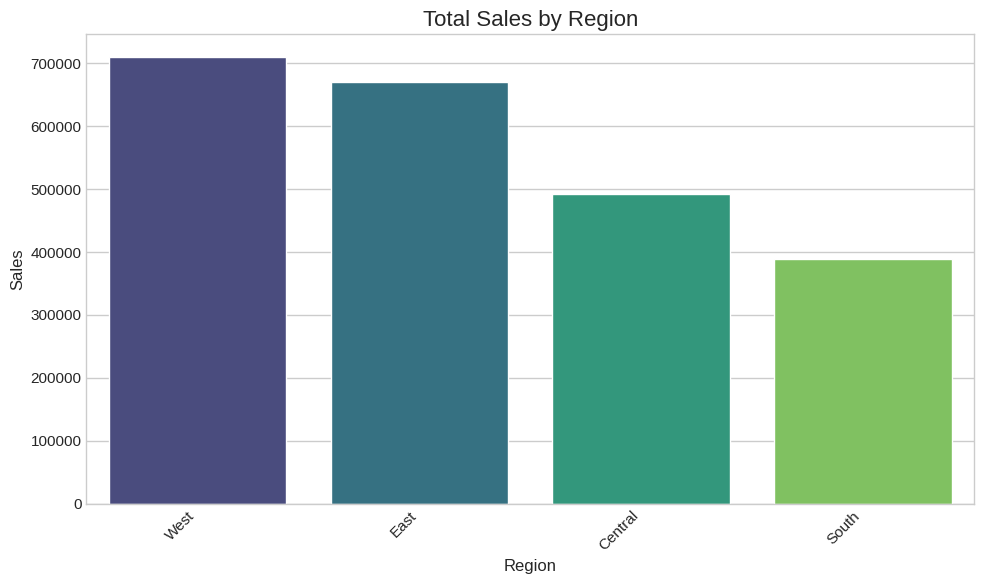

In [9]:
# Creates a bar plot of total sales by region.
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='viridis', dodge=False)
plt.title('Total Sales by Region', fontsize=16)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

## 🏆 Step 10: Top 10 Best-Selling Products
Bar chart showing the top 10 products with the highest total sales.


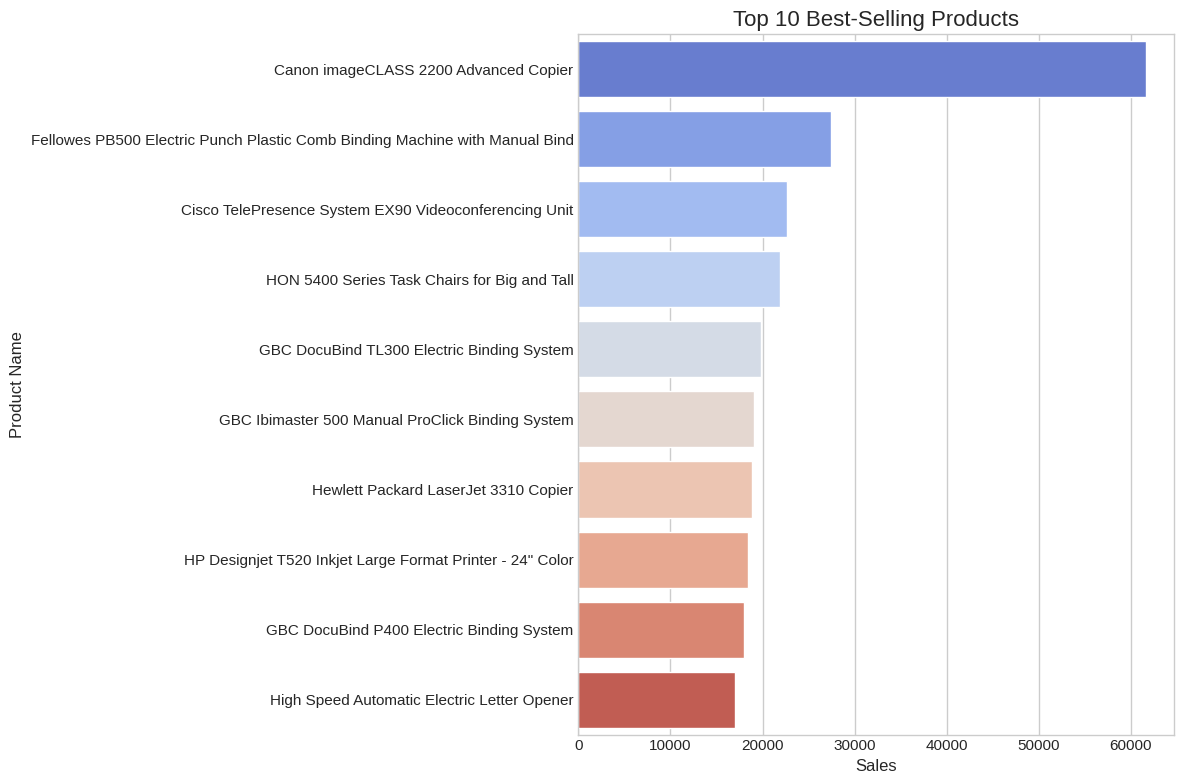

In [10]:
# Creates a bar plot of the top 10 best-selling products.
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='coolwarm', dodge=False)
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

## 👥 Step 11: Customer Segment Analysis
Bar chart showing total sales distribution across different customer segments.


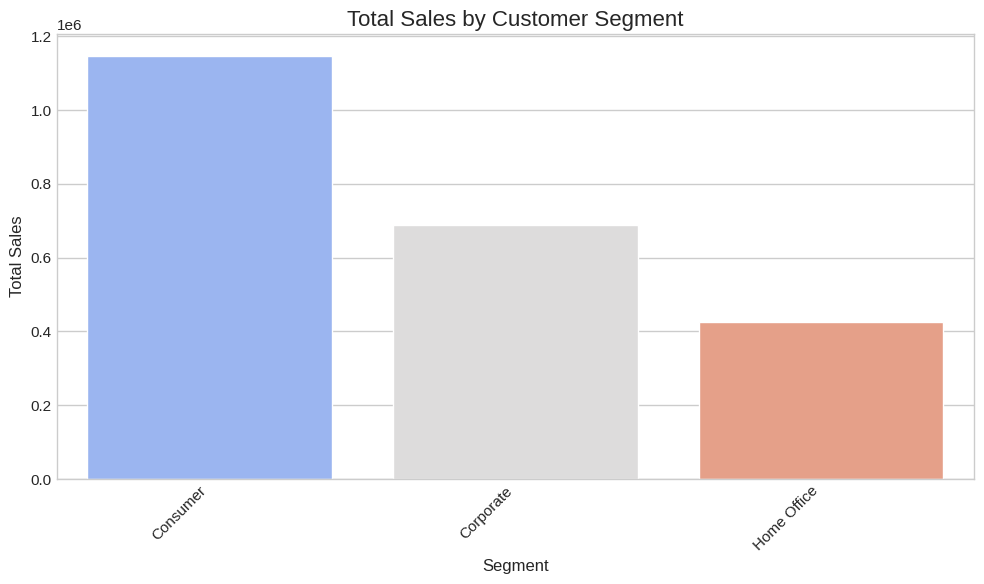

In [11]:
# Creates a bar plot of total sales by customer segment.
plt.figure(figsize=(10, 6))
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=segment_sales.index, y=segment_sales.values, hue=segment_sales.index, palette='coolwarm', dodge=False)
plt.title('Total Sales by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

## 🔥 Step 12: Correlation Heatmap
Heatmap displaying correlation among numerical features like Sales, Profit, Discount, and Quantity.


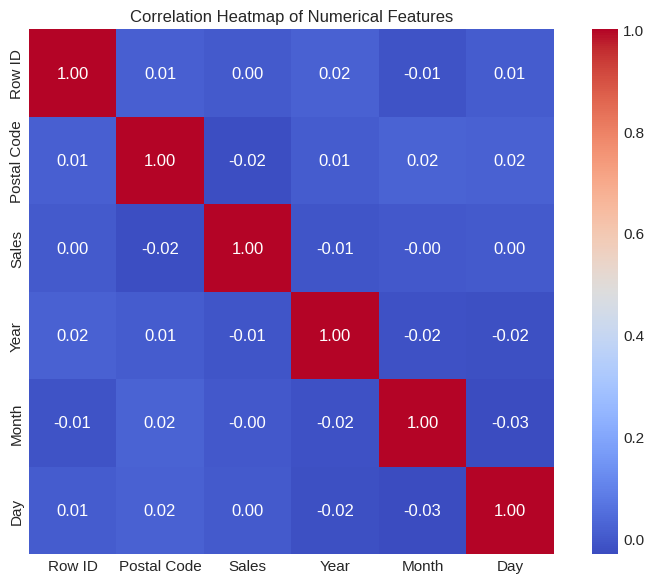

In [12]:
# Creates a correlation heatmap of numerical features.

plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## 📅 Step 13: Sales Trend Across Weekdays
Line plot showing total sales distribution over each day of the week.


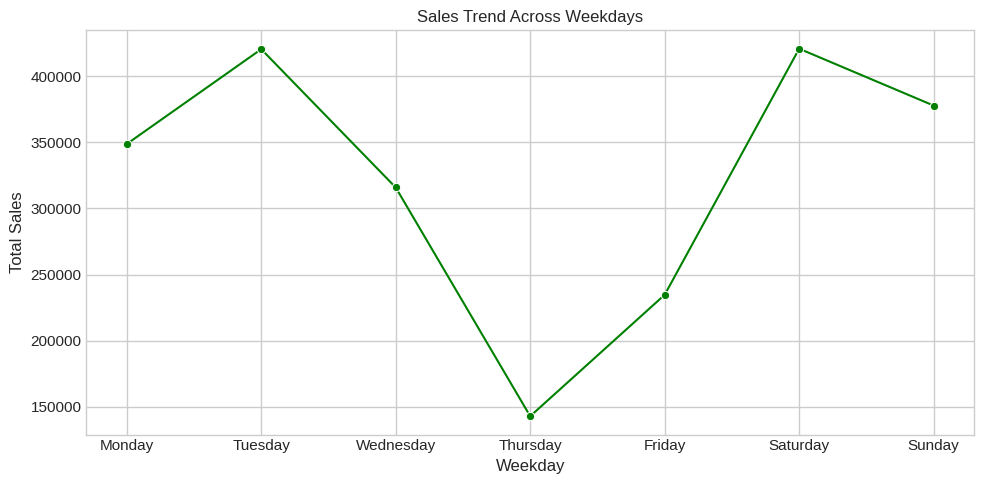

In [13]:
# Creates a line plot of sales trend across weekdays.
plt.figure(figsize=(10, 5))
weekday_sales = df.groupby('Weekday')['Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.lineplot(x=weekday_sales.index, y=weekday_sales.values, marker='o', color='green')
plt.title('Sales Trend Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🌍📦 Step 14: Sales by Category and Region
Bar chart comparing total sales across different product categories in each region.


<Figure size 1200x600 with 0 Axes>

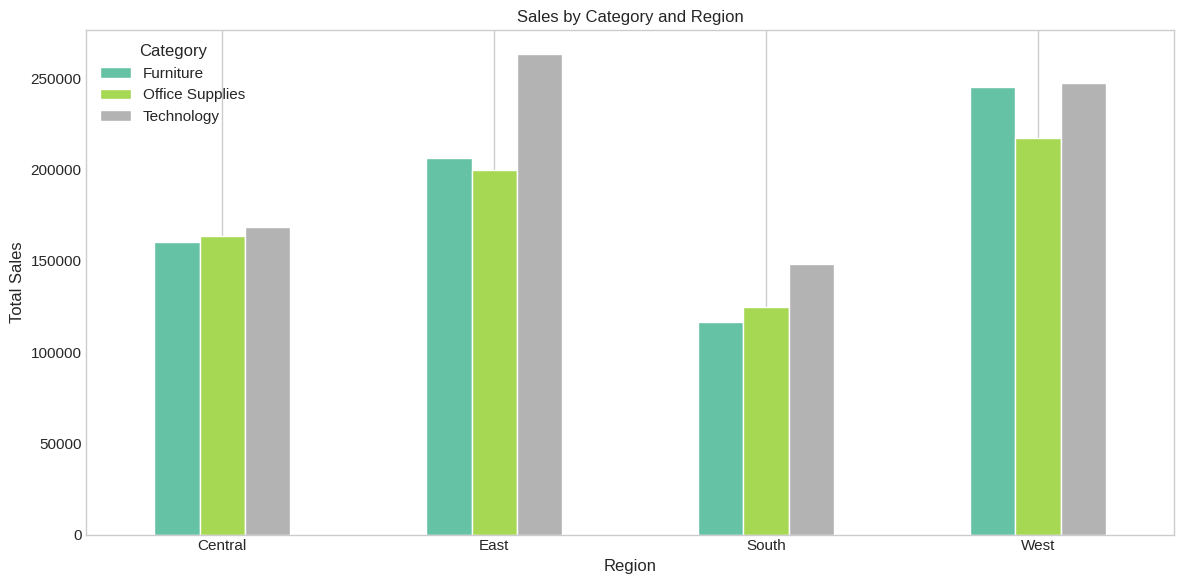

In [14]:
# Creates a bar plot of sales by category and region.
plt.figure(figsize=(12, 6))
grouped_profit = df.groupby(['Region', 'Category'])['Sales'].sum().unstack()

grouped_profit.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Sales by Category and Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## 📊 Step 15: Correlation Heatmap of Numerical Features
This heatmap reveals the relationship strength between numerical columns. It helps identify:
- Positive correlation (dark red)
- Negative correlation (dark blue)
Useful for understanding how features like Sales, Profit, and Discount interact.


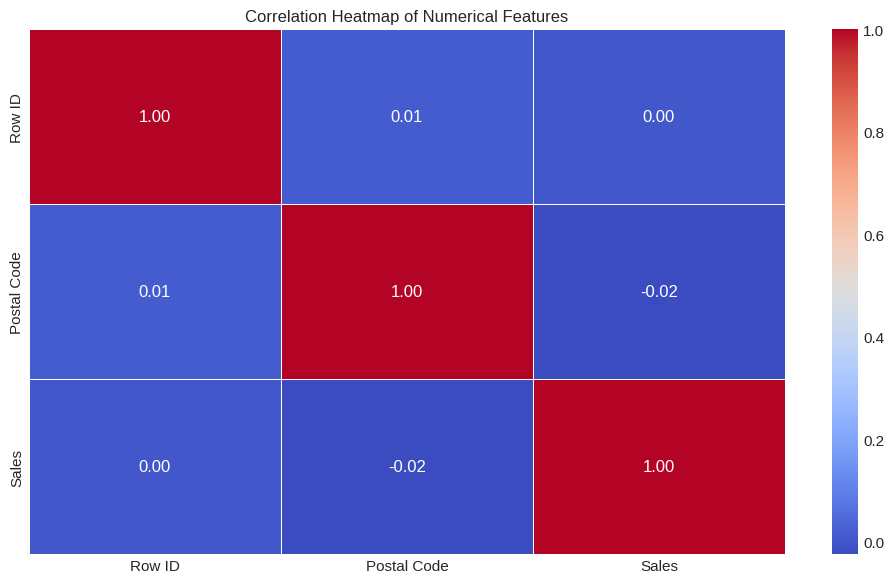

In [15]:
# Creates a correlation heatmap of numerical features.
import seaborn as sns


numeric_df = df.select_dtypes(include=['float64', 'int64'])


corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## 📦 Step 16: Monthly Order Volume Over Time
This bar chart shows how the number of unique orders fluctuates month-by-month across different years. It helps identify:
- Peak sales months
- Seasonal shopping patterns
- Growth or decline in customer activity

📝 Example Insight:
Holiday seasons like **November** and **December** may show high order volumes due to discounts and promotions.


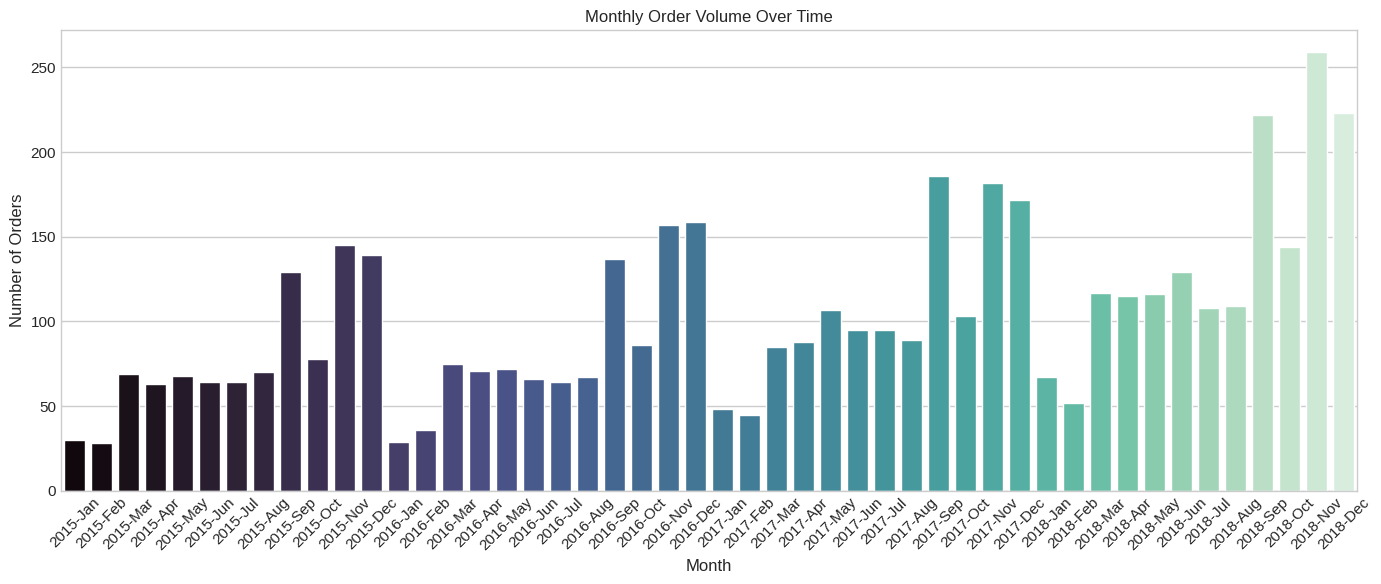

In [16]:
# Creates a bar plot of monthly order volume over time.
import calendar

monthly_orders = df.groupby(['Year', 'Month'])['Order ID'].nunique().reset_index()


monthly_orders['Month Name'] = monthly_orders['Month'].apply(lambda x: calendar.month_abbr[x])

monthly_orders = monthly_orders.sort_values(by=['Year', 'Month'])

monthly_orders['Year-Month'] = monthly_orders['Year'].astype(str) + '-' + monthly_orders['Month Name']


plt.figure(figsize=(14, 6))
sns.barplot(x='Year-Month', y='Order ID', data=monthly_orders, hue='Year-Month', palette='mako', dodge=False)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Volume Over Time')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

## 📈 Step 17: Daily Sales Trend Over Time

This line chart visualizes the daily fluctuations in total sales. It provides insight into:

- Sales spikes (e.g., holidays or promotions)
- Downturns or dips in sales
- Overall trend (growth, decline, or stability)

📝 Example Insight:
Look for consistent growth trends or identify specific days with exceptionally high or low sales to investigate further.


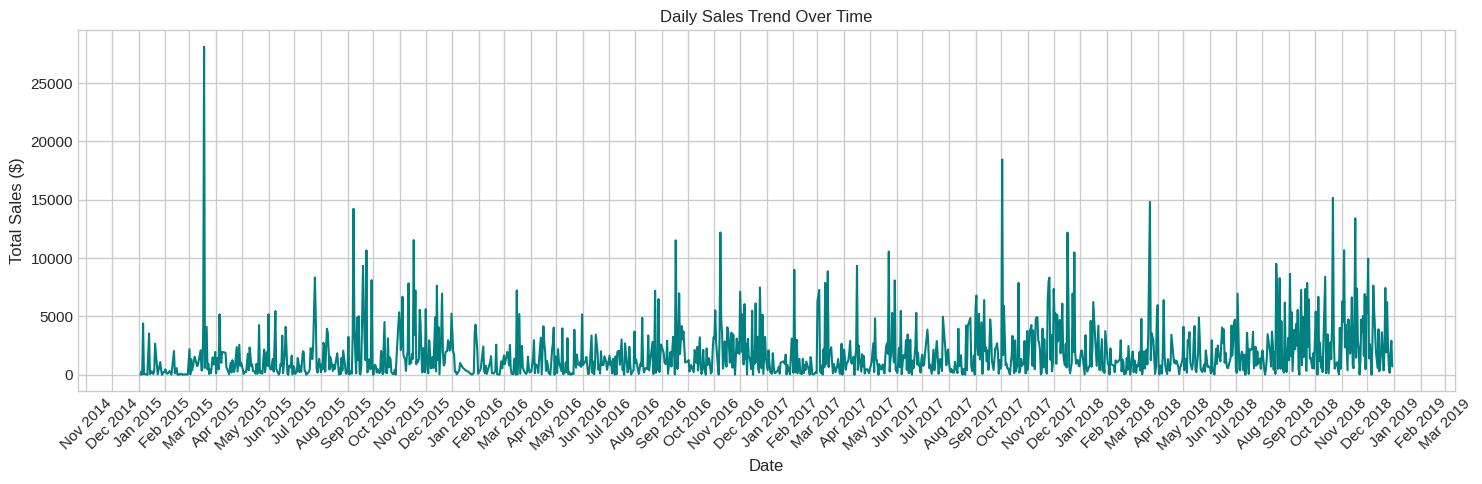

In [17]:
# Creates a line plot of the daily sales trend over time.
import matplotlib.dates as mdates


df['Order Date'] = pd.to_datetime(df['Order Date'])


daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')


plt.figure(figsize=(15, 5))
sns.lineplot(x='Order Date', y='Sales', data=daily_sales, color='teal')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 Step 19: Monthly Sales Trend
This step will help you visualize how sales have varied month by month across all years.

We'll group the data by year and month, calculate total sales, and plot the trend.

## 📊 Step 18: Monthly Sales Trend Analysis

This line chart shows the total sales for each month throughout the dataset. It's useful for:

- Identifying seasonality in sales
- Detecting periods of growth or decline
- Comparing sales across different years

📝 Example Insight:
Spikes in certain months may indicate successful campaigns or seasonal buying habits, while drops could highlight off-seasons or issues to investigate.


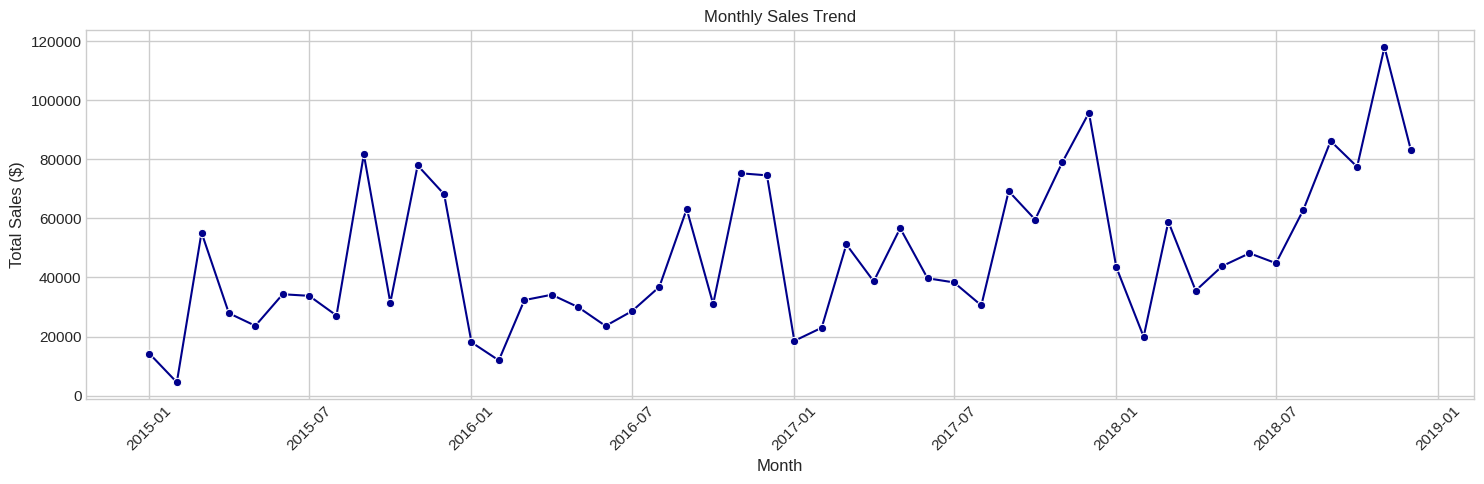

In [18]:
# Creates a line plot of the monthly sales trend.
df['Order Date'] = pd.to_datetime(df['Order Date'])


df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()


monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales['Year-Month'])
monthly_sales = monthly_sales.sort_values('Year-Month')


plt.figure(figsize=(15, 5))
sns.lineplot(x='Year-Month', y='Sales', data=monthly_sales, marker='o', color='darkblue')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Step 19: Monthly Sales Trend Visualization

This line chart presents the **total sales over each month** using the `Year-Month` column from the dataset.

### 🔍 Purpose:
- To **visualize sales trends** over time
- To identify **seasonal patterns** or consistent growth/decline
- Helps in **business forecasting** and decision-making

### 📊 Chart Details:
- X-axis: `Year-Month` (e.g., 2018-01, 2018-02...)
- Y-axis: Total Sales in dollars
- Markers (`o`) highlight individual monthly data points
- Gridlines added for better readability

> ✅ Use this chart to detect months with peak or low sales and explore the reasons behind them (e.g., promotions, holidays, etc.).


/tmp/ipython-input-1861886617.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


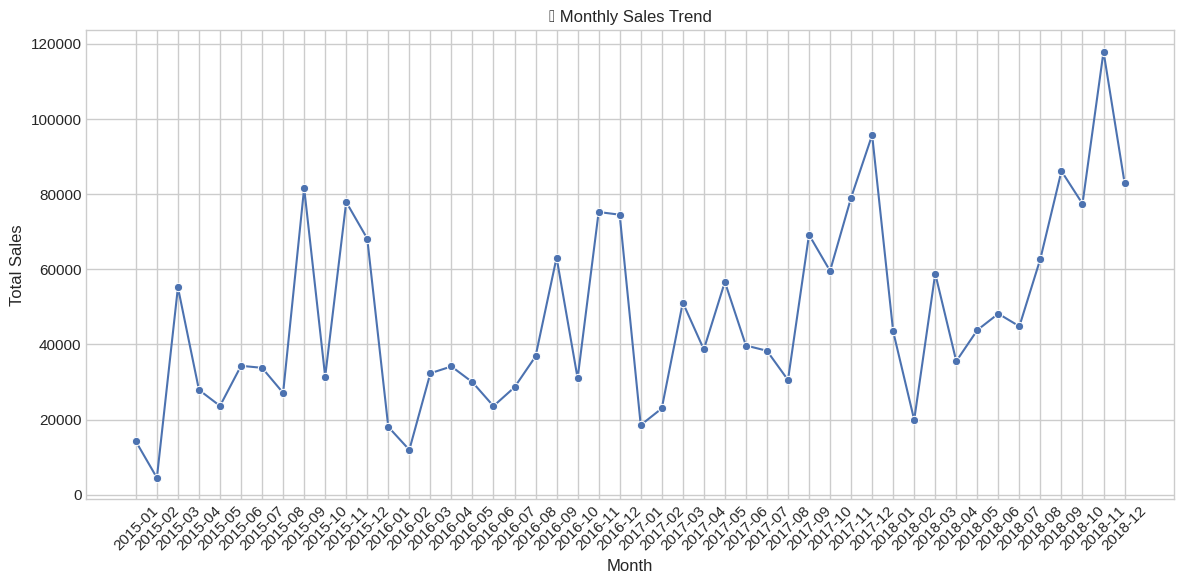

In [19]:
# Creates a line plot of the monthly sales trend.
import matplotlib.pyplot as plt
import seaborn as sns


monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('📈 Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 Step 20: Month-over-Month (MoM) Sales Growth Analysis

We calculated the **Month-over-Month Growth (%)** to measure how sales are changing over time, month by month.

### 🔧 How it works:
- The `% change` is calculated using the `.pct_change()` function on the `Sales` column.
- The result is multiplied by 100 to convert it into a percentage.

### 📑 Resulting Table:
Below are the key columns in the final output:

| Year-Month | Total Sales | MoM Growth (%) |
|------------|-------------|----------------|
| 2018-01    | \$X


In [20]:
# Calculates and displays the month-over-month sales growth.
monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales['Year-Month'])


monthly_sales = monthly_sales.sort_values('Year-Month')


monthly_sales['MoM Growth (%)'] = monthly_sales['Sales'].pct_change() * 100


monthly_sales[['Year-Month', 'Sales', 'MoM Growth (%)']]

,Year-Month,Sales,MoM Growth (%)
0,2015-01-01,14205.7070,NaN
1,2015-02-01,4519.8920,-68.182562
2,2015-03-01,55205.7970,1121.396374
3,2015-04-01,27906.8550,-49.449412
4,2015-05-01,23644.3030,-15.274211
5,2015-06-01,34322.9356,45.163660
6,2015-07-01,33781.5430,-1.577349
7,2015-08-01,27117.5365,-19.726768
8,2015-09-01,81623.5268,200.999048
9,2015-10-01,31453.3930,-61.465286


## 🧾 Step 21: Top 15 Categories and Sub-Categories by Total Sales

We grouped the data by **Category** and **Sub-Category**, then calculated the total sales for each combination. This helps us identify which product areas are generating the most revenue.



In [21]:
# Displays the top 15 categories and sub-categories by total sales.
combined_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False).reset_index()


combined_sales.head(15)

,Category,Sub-Category,Sales
0,Technology,Phones,327782.4480
1,Furniture,Chairs,322822.7310
2,Office Supplies,Storage,219343.3920
3,Furniture,Tables,202810.6280
4,Office Supplies,Binders,200028.7850
5,Technology,Machines,189238.6310
6,Technology,Accessories,164186.7000
7,Technology,Copiers,146248.0940
8,Furniture,Bookcases,113813.1987
9,Office Supplies,Appliances,104618.4030


## 📊 Step 23: Visualizing Sales by Sub-Category (Grouped by Category)

This chart helps us understand which sub-categories are performing well in terms of sales and how they are distributed across different main categories.

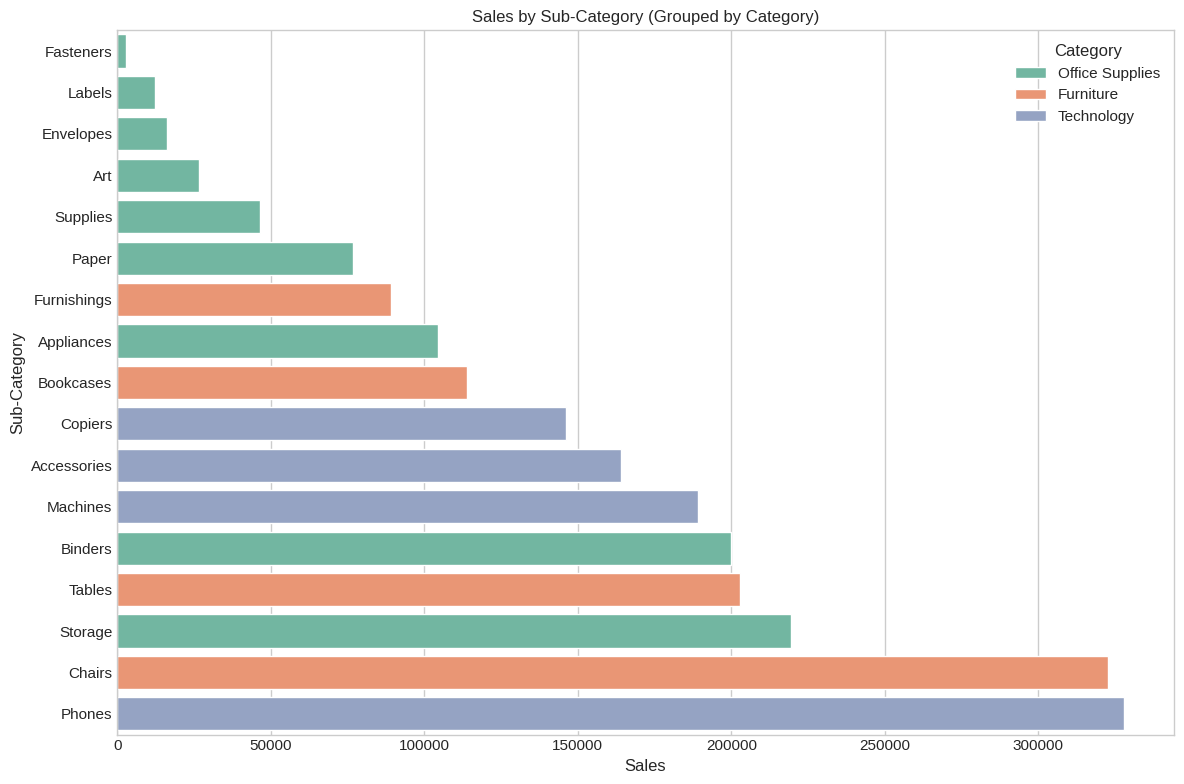

In [22]:
# Creates a bar plot of sales by sub-category, grouped by category.
# Sort for better plotting
combined_sorted = df.groupby(['Sub-Category', 'Category'])['Sales'].sum().sort_values(ascending=True).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=combined_sorted, palette='Set2')
plt.title('Sales by Sub-Category (Grouped by Category)')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

### Step 24 : 📊 Average Sales per Category
This table displays the average sales for each product category, sorted from highest to lowest.


In [23]:
# Calculates and displays the average sales per category.
avg_sales_category = df.groupby('Category')['Sales'].mean().sort_values(ascending=False).reset_index()
avg_sales_category

,Category,Sales
0,Technology,456.401474
1,Furniture,350.653790
2,Office Supplies,119.381001


### 📊 Step 25: Average Sales by Sub-Category (Top 10)
This table shows which sub-categories have the highest average sales, giving insights into the most revenue-generating product types on average.


In [24]:
# Calculates and displays the top 10 sub-categories by average sales.
avg_sales_subcat = df.groupby('Sub-Category')['Sales'].mean().sort_values(ascending=False).reset_index()
avg_sales_subcat.head(10)

,Sub-Category,Sales
0,Copiers,2215.880212
1,Machines,1645.553313
2,Tables,645.893720
3,Chairs,531.833165
4,Bookcases,503.598224
5,Phones,374.180877
6,Storage,263.633885
7,Supplies,252.284283
8,Appliances,227.926804
9,Accessories,217.178175


### 📊 Step 26: Bar Plot of Average Sales per Order by Sub-Category
This visualization shows which sub-categories generate the highest average sales per order. It's useful for identifying high-value products.


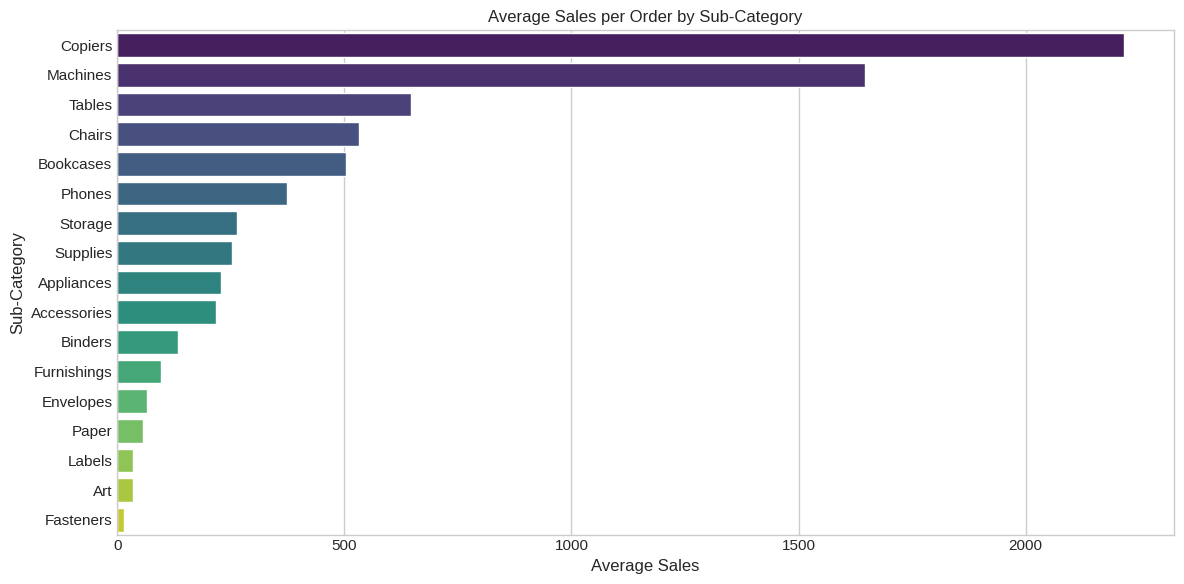

In [25]:
# Creates a bar plot of average sales per order by sub-category.
plt.figure(figsize=(12,6))
sns.barplot(x='Sales', y='Sub-Category', data=avg_sales_subcat, hue='Sub-Category', palette='viridis', dodge=False)
plt.title('Average Sales per Order by Sub-Category')
plt.xlabel('Average Sales')
plt.ylabel('Sub-Category')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

### 🏙️ Step 27: Top 10 Cities by Total Sales
This visualization highlights the cities with the highest total revenue. It helps identify key markets where sales are strongest and can guide marketing and supply chain decisions.


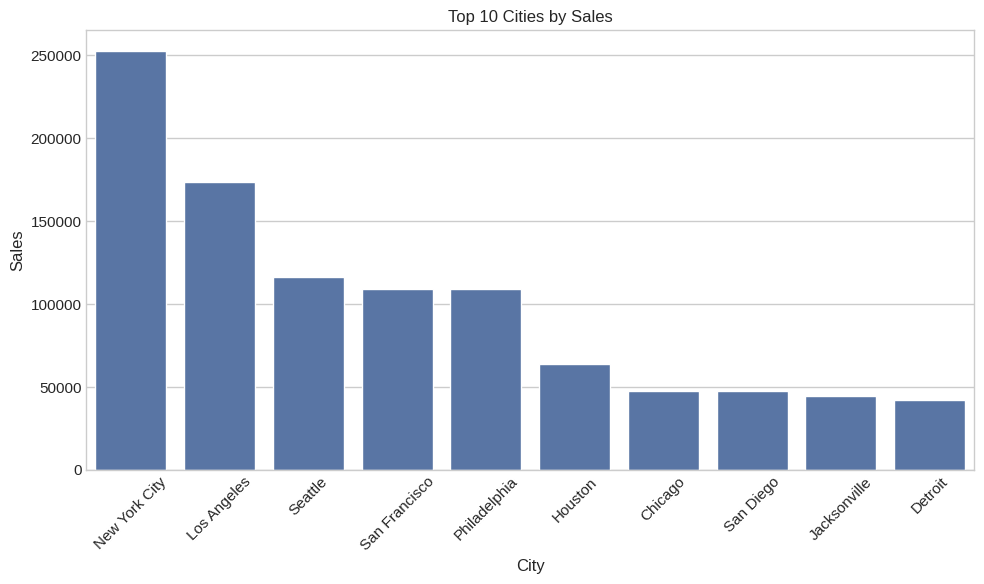

In [26]:
# Creates a bar plot of the top 10 cities by total sales.
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='City', y='Sales')
plt.title('Top 10 Cities by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 Step 28: Combined Sales Analysis Dashboard

This 2x2 subplot dashboard gives a quick overview of key sales performance metrics:

- **Top-left:** Total Sales by Category
- **Top-right:** Total Sales by Region
- **Bottom-left:** Monthly Sales Trend
- **Bottom-right:** Top 10 Cities by Sales

These visualizations help in identifying strong product categories, regions with higher sales, monthly trends, and top-performing cities.



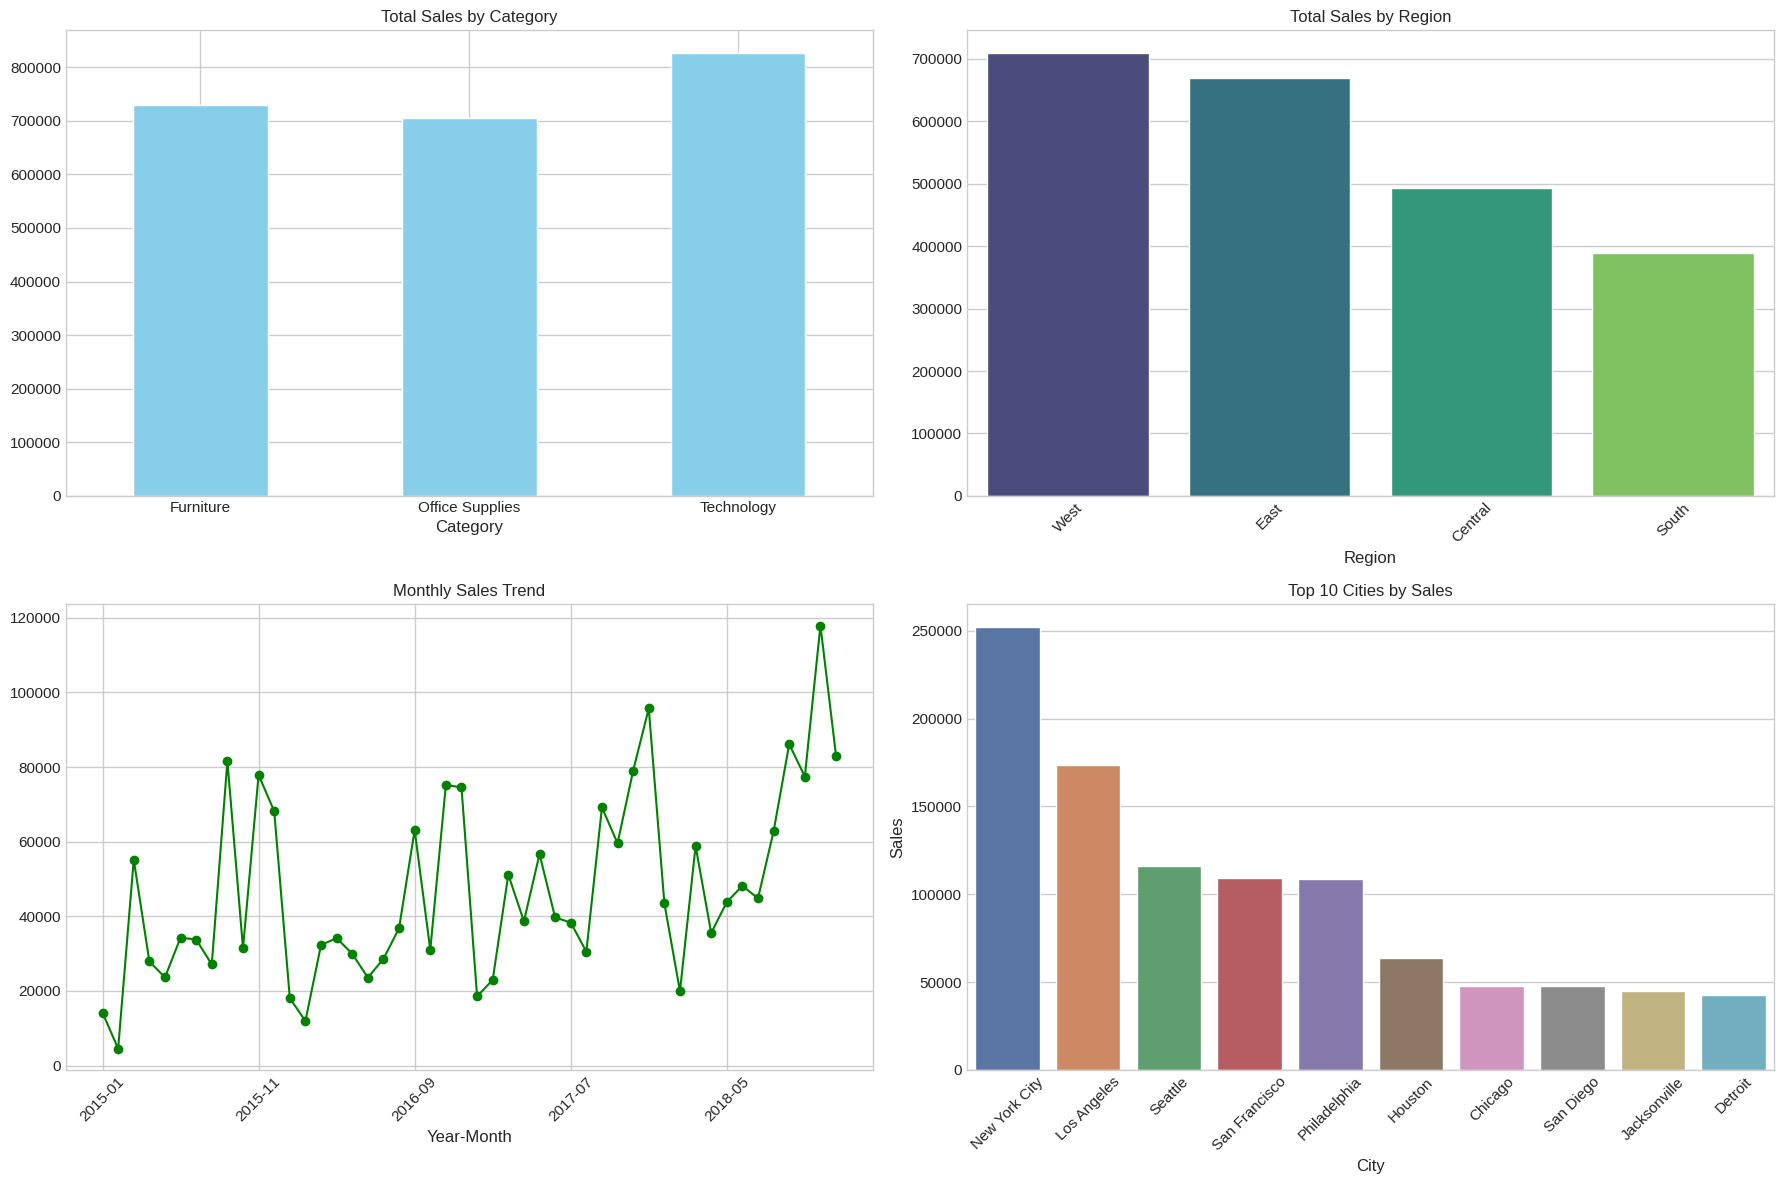

In [27]:
# Creates a 2x2 dashboard of sales analysis plots.
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(18, 12))


df.groupby('Category')['Sales'].sum().plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Total Sales by Category')
axs[0, 0].tick_params(axis='x', rotation=0)


region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, ax=axs[0, 1], hue=region_sales.index, palette='viridis', dodge=False)
axs[0, 1].set_title('Total Sales by Region')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0,1].legend([],[], frameon=False)


df.groupby('Year-Month')['Sales'].sum().plot(ax=axs[1, 0], color='green', marker='o')
axs[1, 0].set_title('Monthly Sales Trend')
axs[1, 0].tick_params(axis='x', rotation=45)


top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_cities, x='City', y='Sales', ax=axs[1, 1], hue='City', dodge=False)
axs[1, 1].set_title('Top 10 Cities by Sales')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1,1].legend([],[], frameon=False)

plt.tight_layout()
plt.show()

### 📉 Step 29: Seasonal Decomposition of Monthly Sales

Using the `seasonal_decompose()` function from `statsmodels`, we decomposed the monthly sales data into four components:

- **Observed**: Actual sales values.
- **Trend**: Long-term growth or decline.
- **Seasonal**: Repeating monthly patterns.
- **Residual**: Random noise or unexpected variations.

This helps uncover hidden patterns in the data and supports better forecasting and strategy planning.


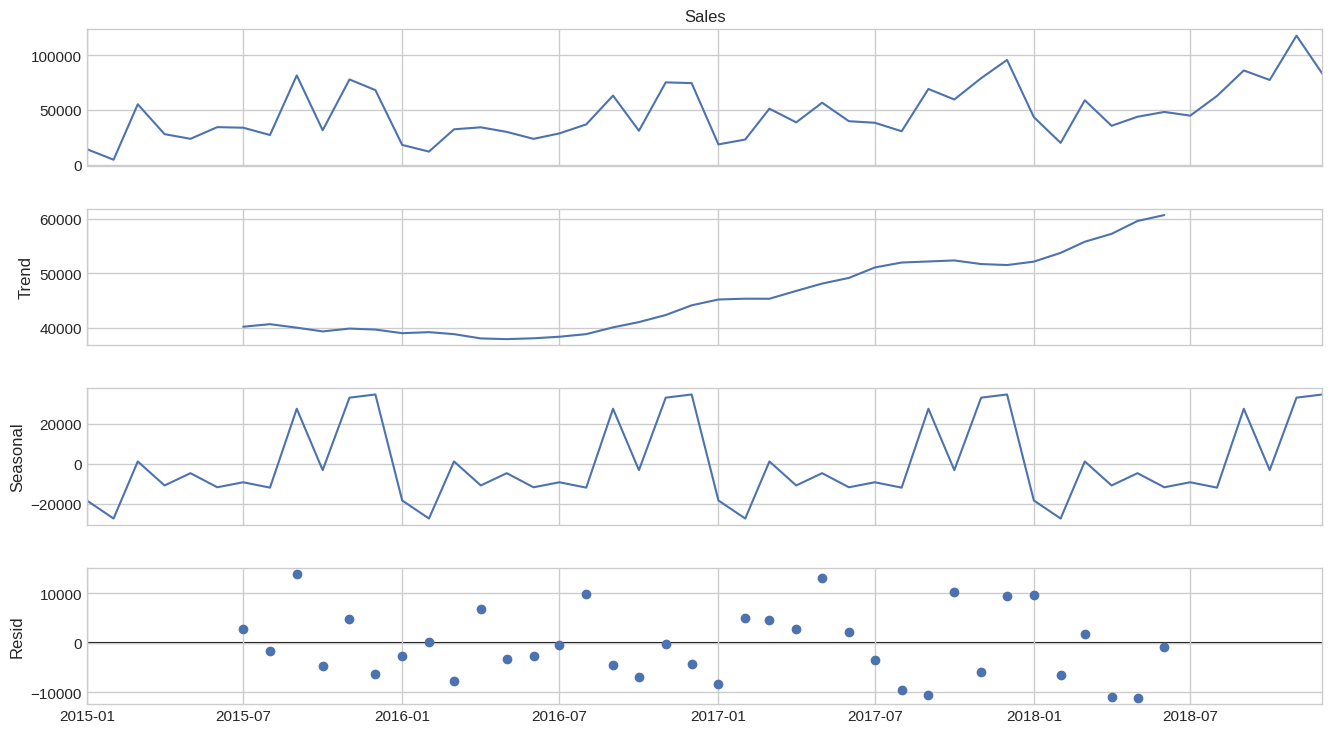

In [28]:
# Decomposes the monthly sales data into trend, seasonal, and residual components.
from statsmodels.tsa.seasonal import seasonal_decompose


monthly_sales.set_index('Year-Month', inplace=True)


decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive')

fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

###END

## 💾 Step 30: Save Visualizations for Streamlit App

This step saves all the generated visualizations as high-resolution PNG images. These images can then be easily loaded and displayed in a Streamlit web application to showcase your data analysis and insights.

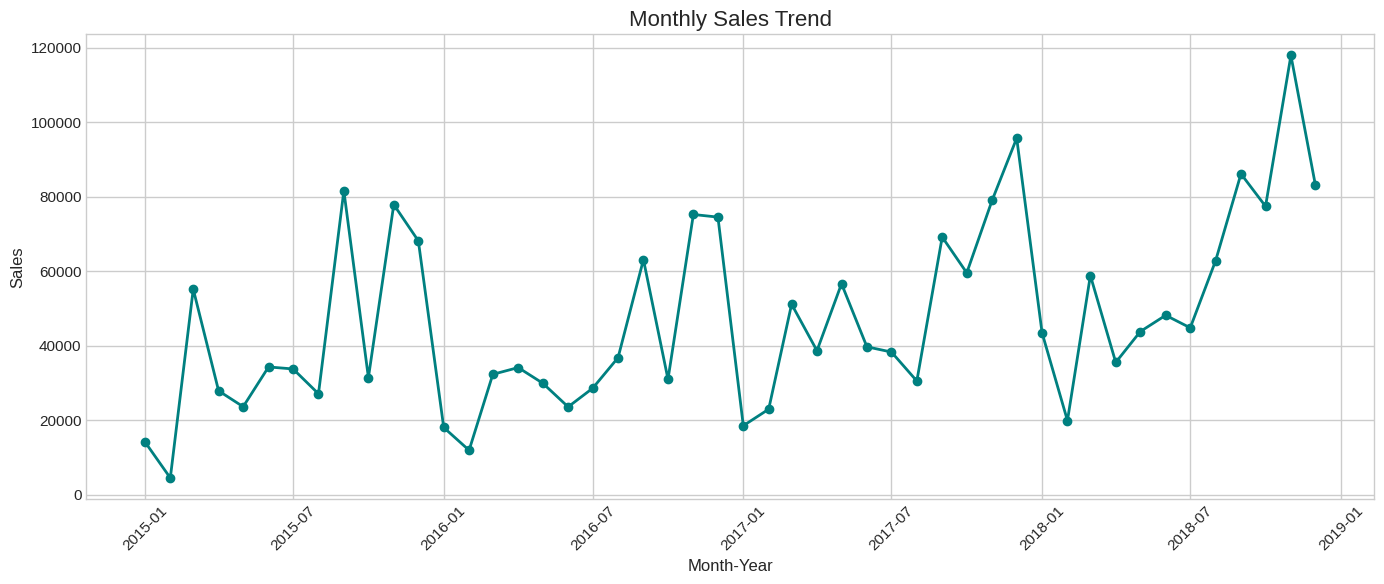

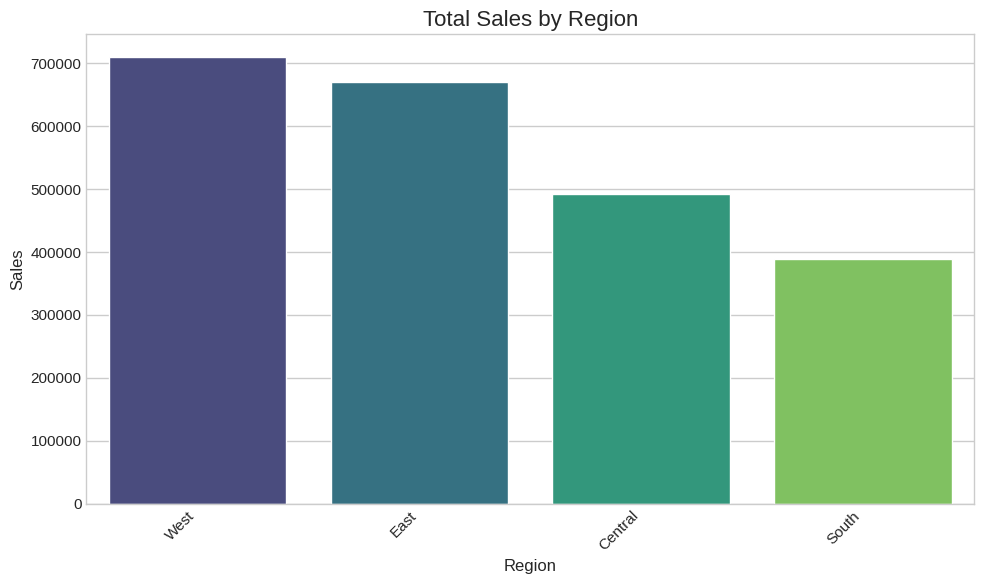

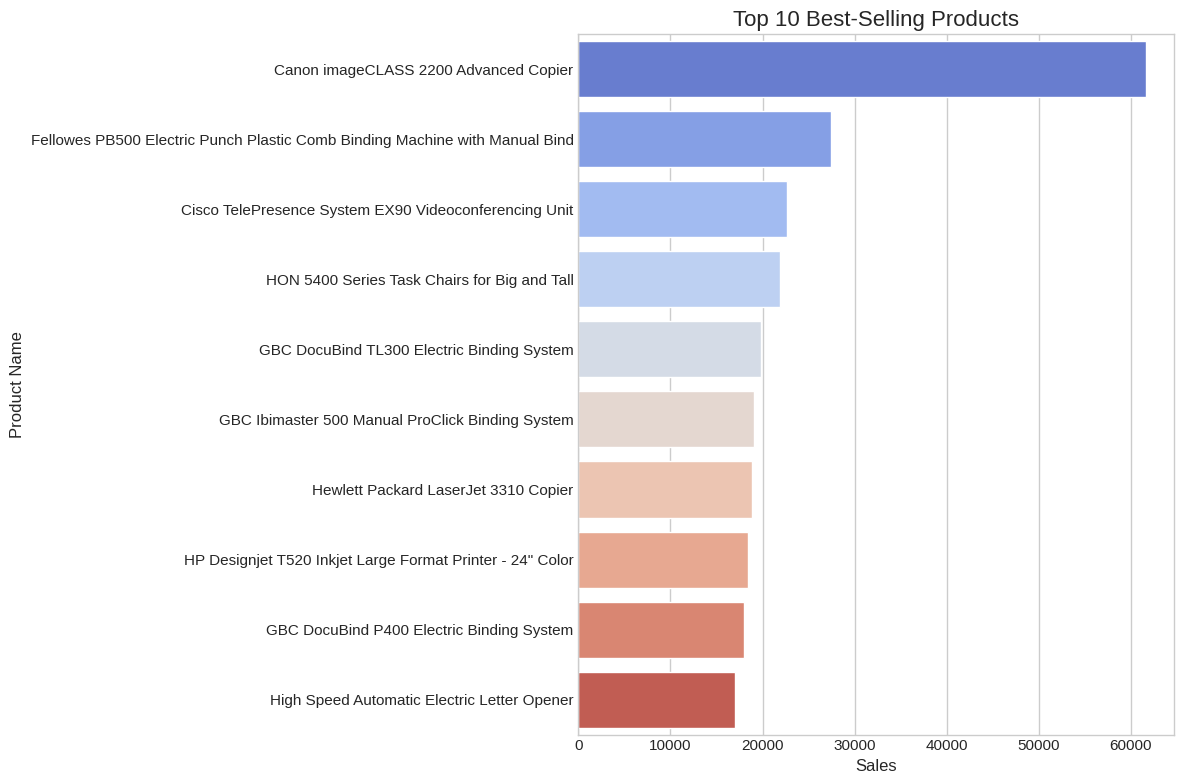

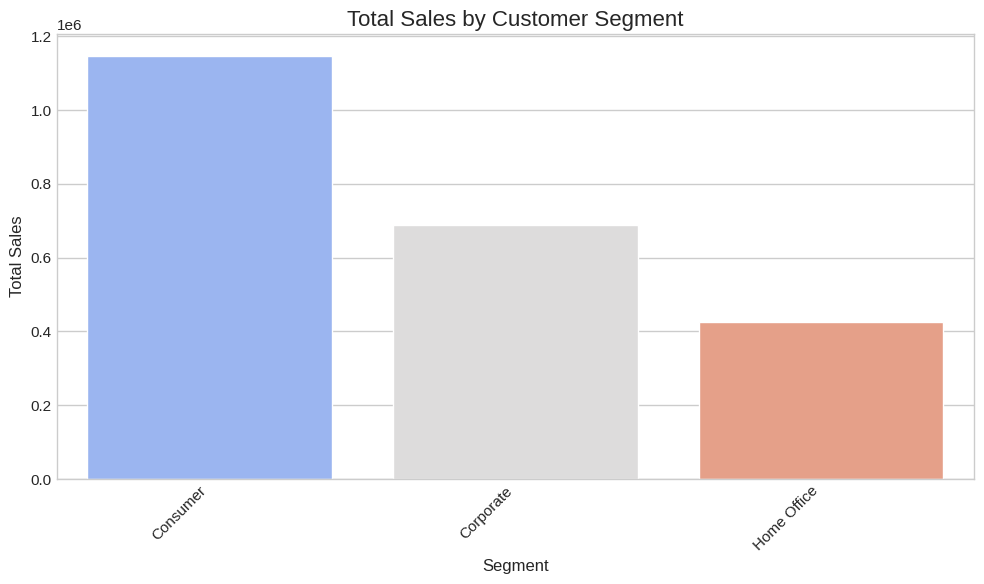

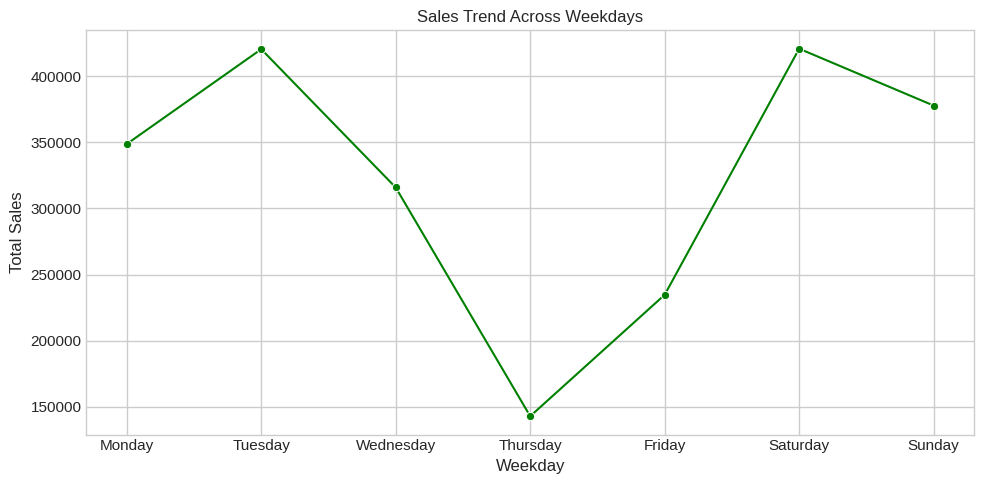

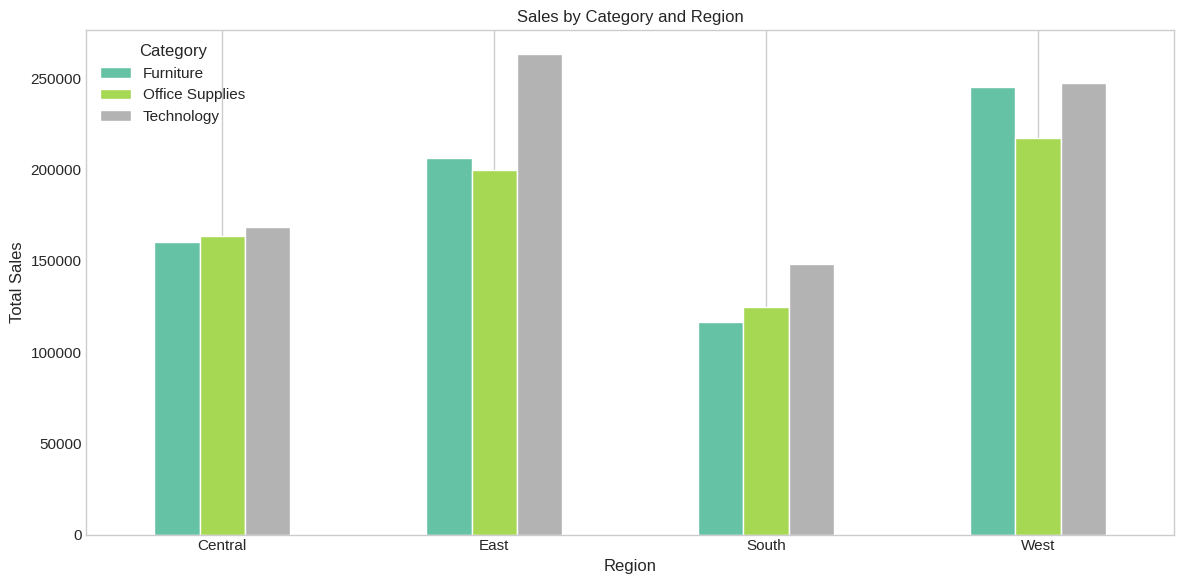

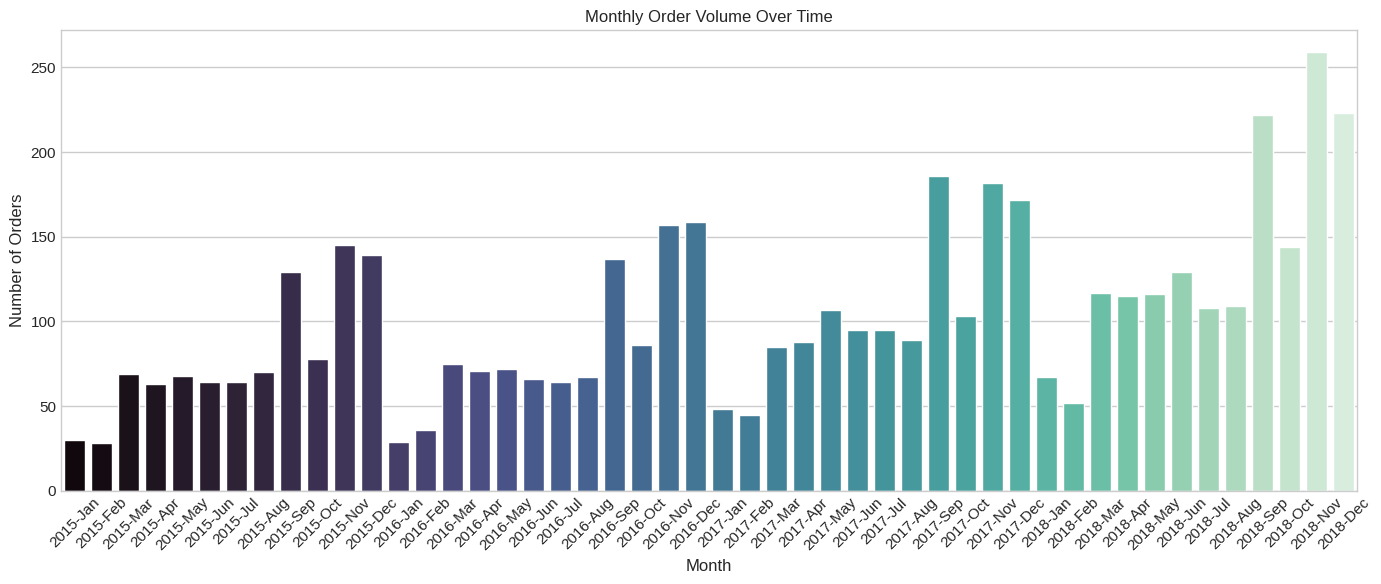

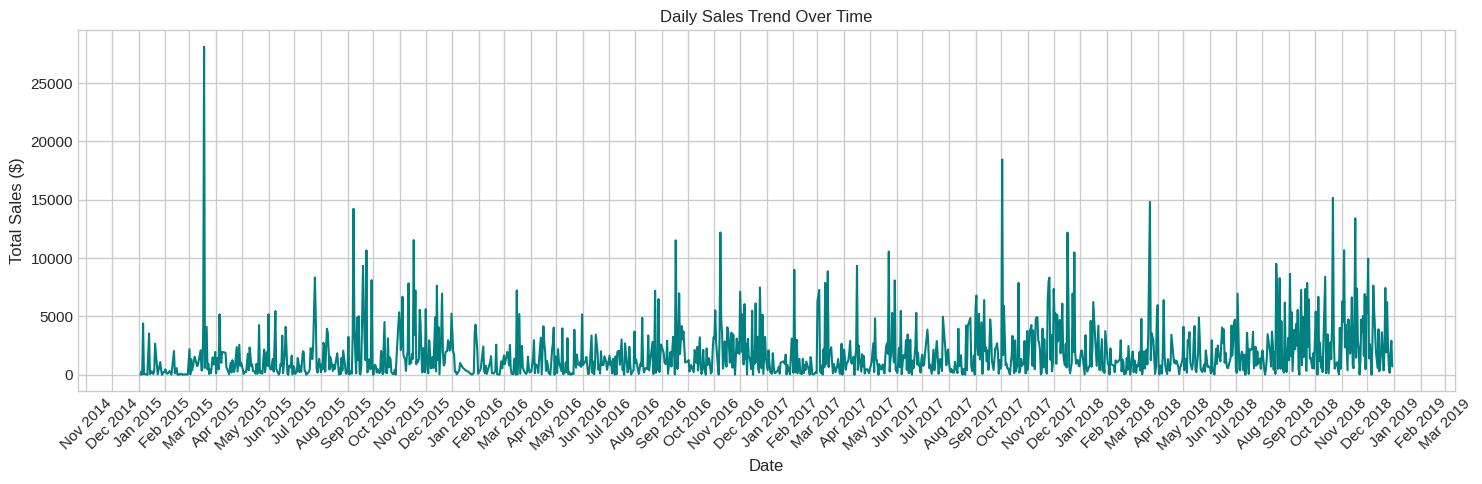

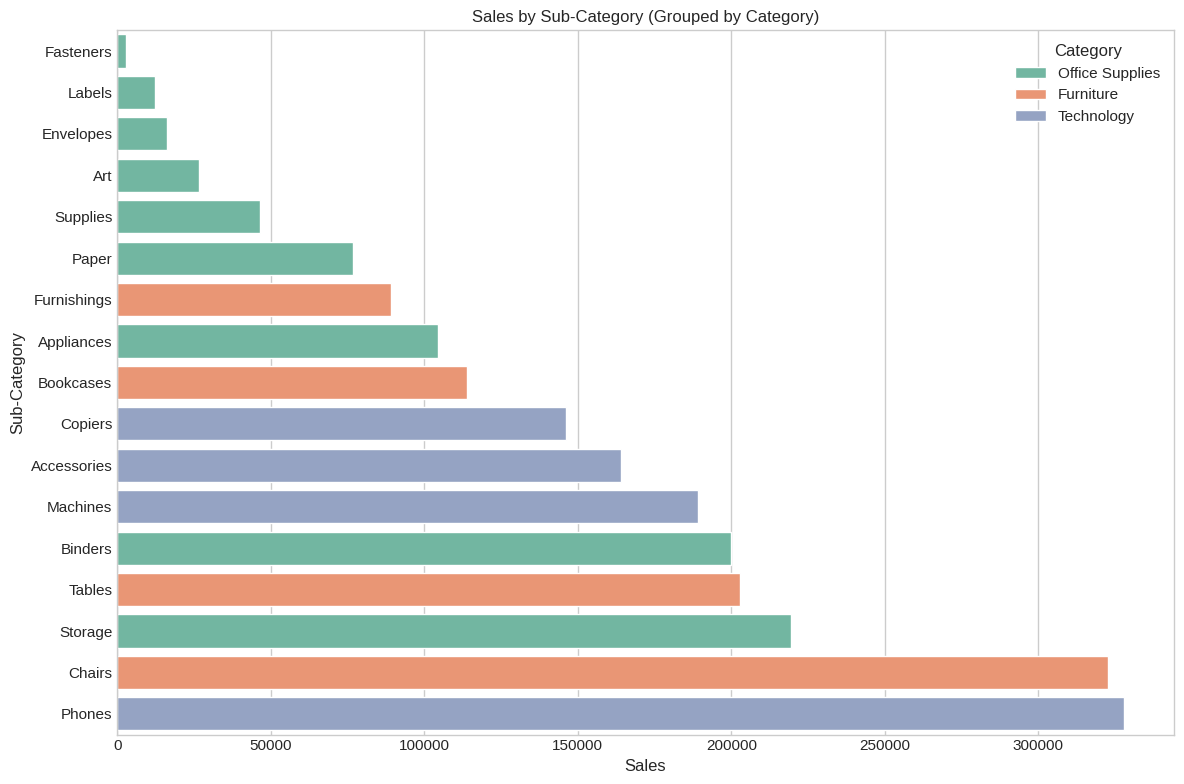

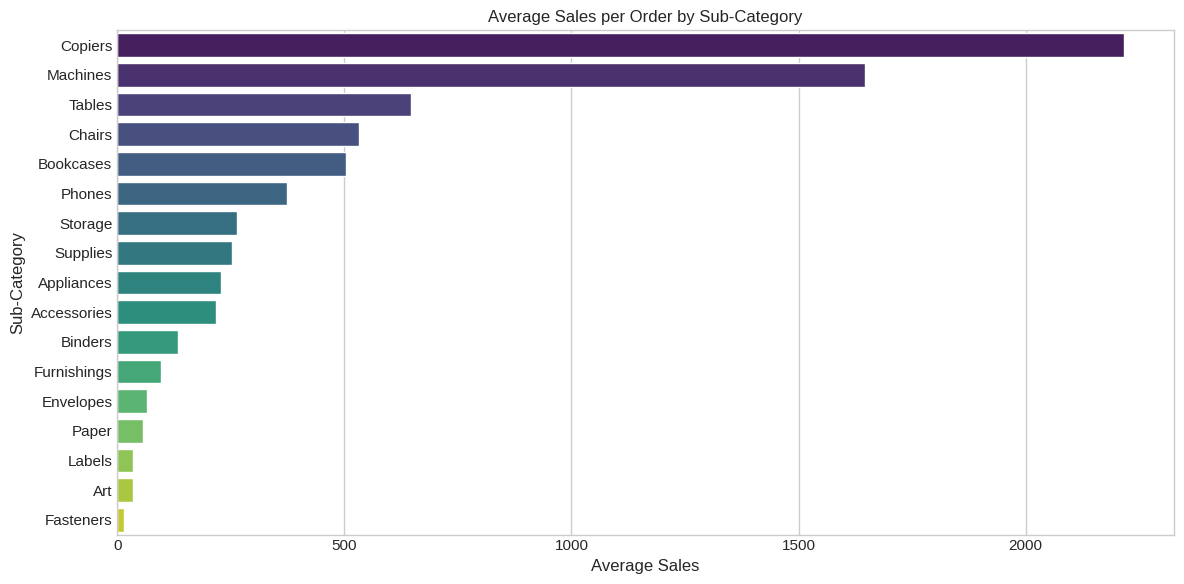

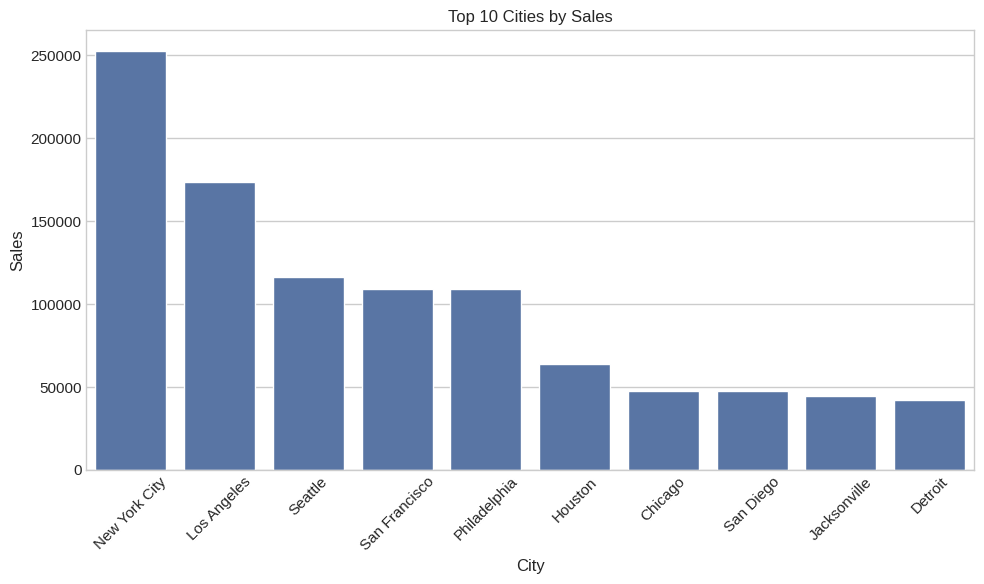

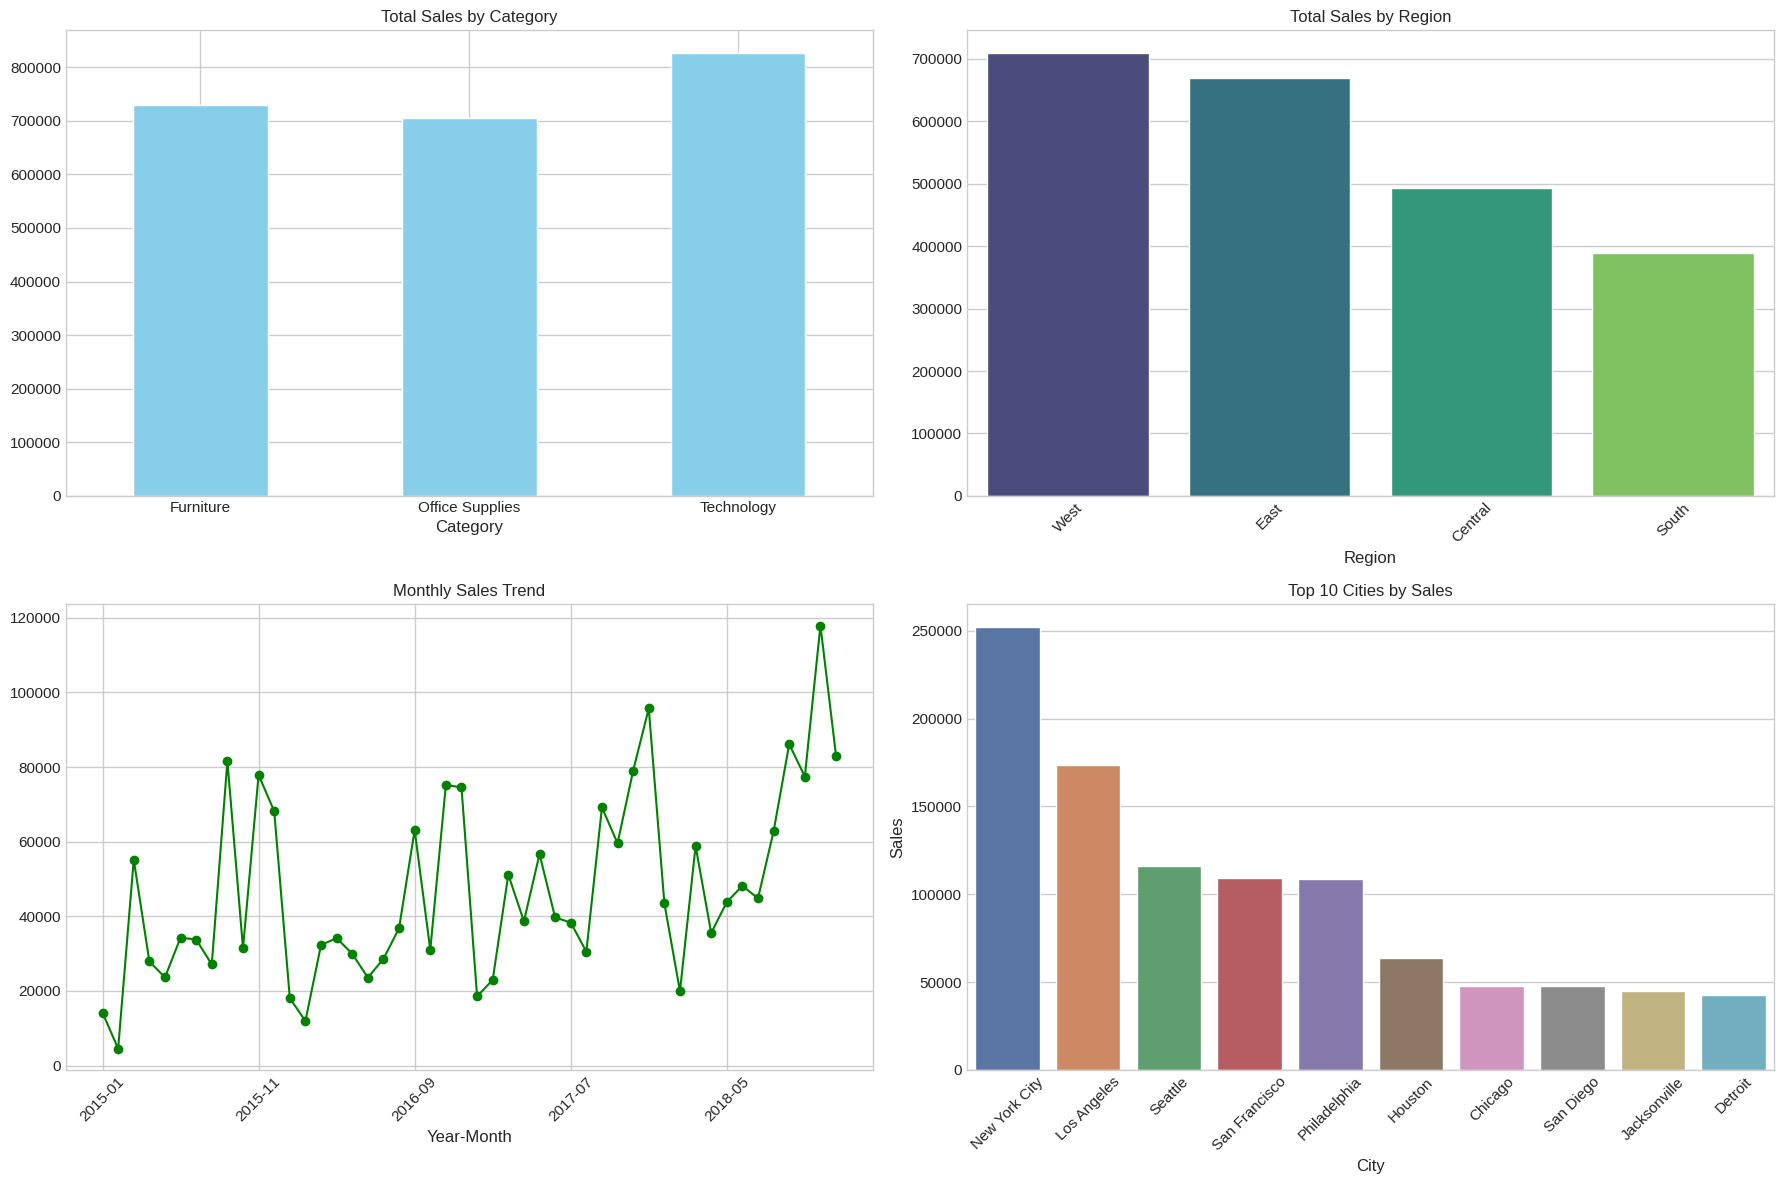

In [29]:
# Save all the plots as PNG files for Streamlit

# Monthly Sales Trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o', color='teal', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_sales_trend.png", dpi=300)
plt.show()

# Total Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='viridis', dodge=False)
plt.title('Total Sales by Region', fontsize=16)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig("total_sales_by_region.png", dpi=300)
plt.show()

# Top 10 Best-Selling Products
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='coolwarm', dodge=False)
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig("top_10_best_selling_products.png", dpi=300)
plt.show()

# Total Sales by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_sales.index, y=segment_sales.values, hue=segment_sales.index, palette='coolwarm', dodge=False)
plt.title('Total Sales by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig("total_sales_by_customer_segment.png", dpi=300)
plt.show()

# Sales Trend Across Weekdays
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekday_sales.index, y=weekday_sales.values, marker='o', color='green')
plt.title('Sales Trend Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig("sales_trend_across_weekdays.png", dpi=300)
plt.show()

# Sales by Category and Region
grouped_profit.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Sales by Category and Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("sales_by_category_and_region.png", dpi=300)
plt.show()

# Monthly Order Volume Over Time
plt.figure(figsize=(14, 6))
sns.barplot(x='Year-Month', y='Order ID', data=monthly_orders, hue='Year-Month', palette='mako', dodge=False)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Volume Over Time')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig("monthly_order_volume_over_time.png", dpi=300)
plt.show()

# Daily Sales Trend Over Time
plt.figure(figsize=(15, 5))
sns.lineplot(x='Order Date', y='Sales', data=daily_sales, color='teal')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("daily_sales_trend_over_time.png", dpi=300)
plt.show()

# Sales by Sub-Category (Grouped by Category)
plt.figure(figsize=(12,8))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=combined_sorted, palette='Set2')
plt.title('Sales by Sub-Category (Grouped by Category)')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.savefig("sales_by_subcategory_grouped_by_category.png", dpi=300)
plt.show()

# Average Sales per Order by Sub-Category
plt.figure(figsize=(12,6))
sns.barplot(x='Sales', y='Sub-Category', data=avg_sales_subcat, hue='Sub-Category', palette='viridis', dodge=False)
plt.title('Average Sales per Order by Sub-Category')
plt.xlabel('Average Sales')
plt.ylabel('Sub-Category')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig("average_sales_per_order_by_subcategory.png", dpi=300)
plt.show()

# Top 10 Cities by Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='City', y='Sales')
plt.title('Top 10 Cities by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_10_cities_by_sales.png", dpi=300)
plt.show()

# Combined Sales Analysis Dashboard
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
df.groupby('Category')['Sales'].sum().plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Total Sales by Category')
axs[0, 0].tick_params(axis='x', rotation=0)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, ax=axs[0, 1], hue=region_sales.index, palette='viridis', dodge=False)
axs[0, 1].set_title('Total Sales by Region')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0,1].legend([],[], frameon=False)
df.groupby('Year-Month')['Sales'].sum().plot(ax=axs[1, 0], color='green', marker='o')
axs[1, 0].set_title('Monthly Sales Trend')
axs[1, 0].tick_params(axis='x', rotation=45)
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_cities, x='City', y='Sales', ax=axs[1, 1], hue='City', dodge=False)
axs[1, 1].set_title('Top 10 Cities by Sales')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1,1].legend([],[], frameon=False)
plt.tight_layout()
plt.savefig("sales_dashboard.png", dpi=300)
plt.show()

## 🚀 Step 31: Create and Run Your Streamlit App

This step provides the complete code for a Streamlit web application that displays the visualizations you've created.

**To run the app:**

1.  Save the code below as a Python file named `app.py`.
2.  Make sure you have Streamlit installed (`pip install streamlit`).
3.  Open your terminal, navigate to the directory where you saved `app.py` and the saved image files, and run the following command:

In [30]:
%%writefile app.py
import streamlit as st
from PIL import Image

st.set_page_config(layout="wide")
st.title("📊 Sales Analysis Dashboard")

st.header("Monthly Sales Trend")
st.image('monthly_sales_trend.png', caption='Monthly Sales Trend')

st.header("Total Sales by Region")
st.image('total_sales_by_region.png', caption='Total Sales by Region')

st.header("Top 10 Best-Selling Products")
st.image('top_10_best_selling_products.png', caption='Top 10 Best-Selling Products')

st.header("Total Sales by Customer Segment")
st.image('total_sales_by_customer_segment.png', caption='Total Sales by Customer Segment')

st.header("Sales Trend Across Weekdays")
st.image('sales_trend_across_weekdays.png', caption='Sales Trend Across Weekdays')

st.header("Sales by Category and Region")
st.image('sales_by_category_and_region.png', caption='Sales by Category and Region')

st.header("Monthly Order Volume Over Time")
st.image('monthly_order_volume_over_time.png', caption='Monthly Order Volume Over Time')

st.header("Daily Sales Trend Over Time")
st.image('daily_sales_trend_over_time.png', caption='Daily Sales Trend Over Time')

st.header("Sales by Sub-Category (Grouped by Category)")
st.image('sales_by_subcategory_grouped_by_category.png', caption='Sales by Sub-Category (Grouped by Category)')

st.header("Average Sales per Order by Sub-Category")
st.image('average_sales_per_order_by_subcategory.png', caption='Average Sales per Order by Sub-Category')

st.header("Top 10 Cities by Sales")
st.image('top_10_cities_by_sales.png', caption='Top 10 Cities by Sales')

st.header("Sales Dashboard")
st.image('sales_dashboard.png', caption='Sales Dashboard')

Writing app.py


In [32]:
!pip install -q streamlit
!pip install -q pyngrok

# Add your ngrok authtoken here
!ngrok authtoken

!streamlit run app.py &>/dev/null&
from pyngrok import ngrok
public_url = ngrok.connect(addr='8501', proto='http')
print(public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
NgrokTunnel: "https://c40c20f734df.ngrok-free.app" -> "http://localhost:8501"
